In [2]:
# Analyzing Customer Churn in a Telecommunications Company

In [1]:
# 1. Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
telecom_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# 2. Explore the Dataset
print("Dataset Info:")
print(telecom_data.info())
print("\nDataset Summary:")
print(telecom_data.describe())
print("\nSample Data:")
print(telecom_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [4]:
# 3. Handle Missing Values
print("\nMissing Values Count:")
print(telecom_data.isnull().sum())


Missing Values Count:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Deciding on a missing data strategy:
# For numerical columns, fill with median; for categorical columns, use the mode.
for column in telecom_data.columns:
    if telecom_data[column].dtype == 'object':
        telecom_data[column].fillna(telecom_data[column].mode()[0], inplace=True)
    else:
        telecom_data[column].fillna(telecom_data[column].median(), inplace=True)

C:\Users\bargi\AppData\Local\Temp\ipykernel_1984\1972756462.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_data[column].fillna(telecom_data[column].mode()[0], inplace=True)
C:\Users\bargi\AppData\Local\Temp\ipykernel_1984\1972756462.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [6]:
# 4. Remove Duplicate Records
print(f"\nDuplicates before removal: {telecom_data.duplicated().sum()}")
telecom_data.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {telecom_data.duplicated().sum()}")


Duplicates before removal: 0
Duplicates after removal: 0


In [7]:
# 5. Check and Standardize Inconsistent Data
# Example: Standardizing 'Yes', 'No' to lowercase
for column in telecom_data.select_dtypes(include=['object']).columns:
    telecom_data[column] = telecom_data[column].str.lower().str.strip()

In [8]:
# Check unique values for any potential inconsistencies
for column in telecom_data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{column}': {telecom_data[column].unique()}")



Unique values in 'customerID': ['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']

Unique values in 'gender': ['female' 'male']

Unique values in 'Partner': ['yes' 'no']

Unique values in 'Dependents': ['no' 'yes']

Unique values in 'PhoneService': ['no' 'yes']

Unique values in 'MultipleLines': ['no phone service' 'no' 'yes']

Unique values in 'InternetService': ['dsl' 'fiber optic' 'no']

Unique values in 'OnlineSecurity': ['no' 'yes' 'no internet service']

Unique values in 'OnlineBackup': ['yes' 'no' 'no internet service']

Unique values in 'DeviceProtection': ['no' 'yes' 'no internet service']

Unique values in 'TechSupport': ['no' 'yes' 'no internet service']

Unique values in 'StreamingTV': ['no' 'yes' 'no internet service']

Unique values in 'StreamingMovies': ['no' 'yes' 'no internet service']

Unique values in 'Contract': ['month-to-month' 'one year' 'two year']

Unique values in 'PaperlessBilling': ['yes' 'no']

Unique values in 'PaymentMet

In [9]:
# 6. Convert Columns to Correct Data Types
# For example, converting any columns like 'TotalCharges' to numeric if needed
# Here we assume 'TotalCharges' might need conversion.
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')

# Re-check for nulls after conversion and handle them
telecom_data['TotalCharges'].fillna(telecom_data['TotalCharges'].median(), inplace=True)


C:\Users\bargi\AppData\Local\Temp\ipykernel_1984\470636567.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telecom_data['TotalCharges'].fillna(telecom_data['TotalCharges'].median(), inplace=True)


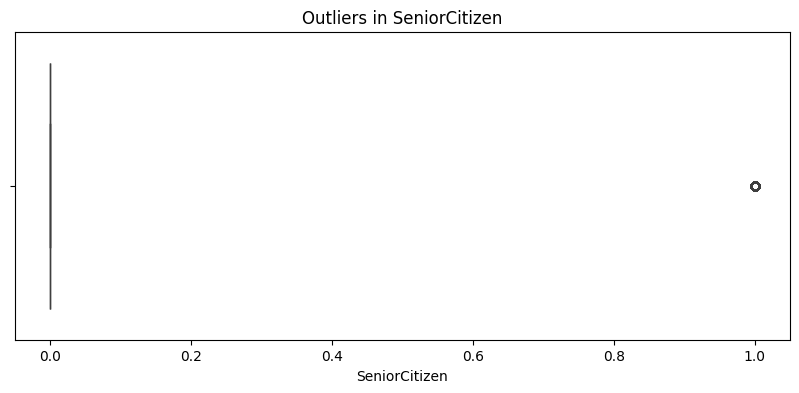

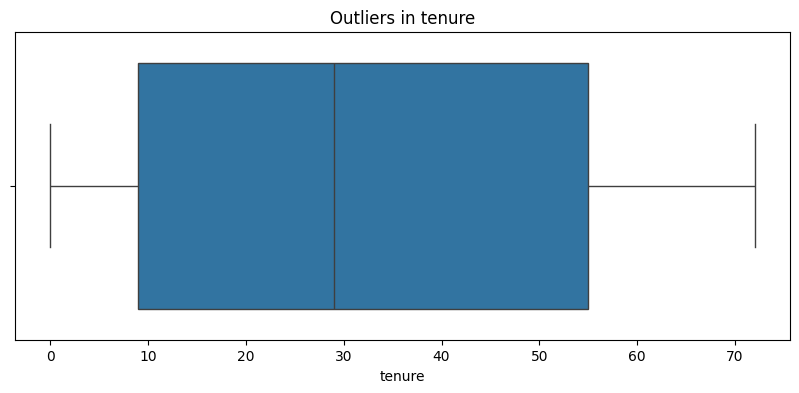

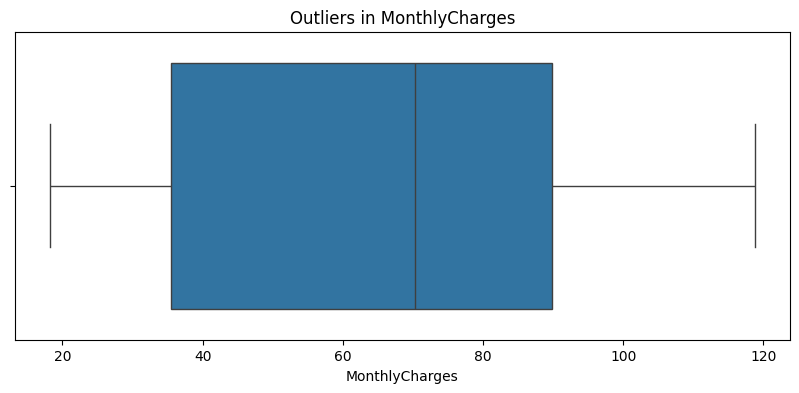

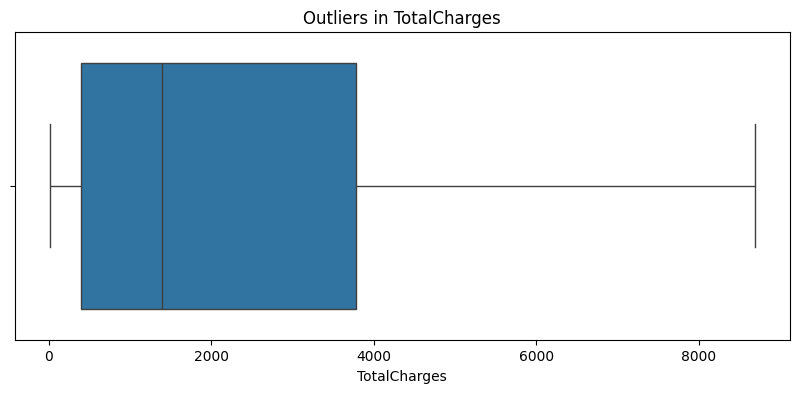

In [10]:
# 7. Identify and Handle Outliers
# Using box plots for visualizing outliers in numerical columns
numeric_cols = telecom_data.select_dtypes(include=[np.number]).columns

for column in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=telecom_data, x=column)
    plt.title(f"Outliers in {column}")
    plt.show()

In [11]:
# Removing outliers by capping using IQR method
for column in numeric_cols:
    Q1 = telecom_data[column].quantile(0.25)
    Q3 = telecom_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    telecom_data[column] = np.where(telecom_data[column] < lower_bound, lower_bound,
                                    np.where(telecom_data[column] > upper_bound, upper_bound, telecom_data[column]))

# Confirm final dataset state
print("\nFinal Dataset Info:")
print(telecom_data.info())
print("\nFinal Dataset Summary:")
print(telecom_data.describe())


Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704